In [1]:
import pandas as pd

In [2]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [3]:
%ls ..

 Volume in drive C is OS
 Volume Serial Number is 1413-FC64

 Directory of c:\Users\praty\Desktop\shortnote\resume projects\99_ML\Segmentation_kmeans

09/02/2025  09:09 PM    <DIR>          .
09/02/2025  09:10 PM    <DIR>          ..
09/02/2025  08:26 PM    <DIR>          1. Custom ML Function
09/02/2025  08:27 PM    <DIR>          2. Use of Library
09/02/2025  08:24 PM    <DIR>          Dataset
09/02/2025  09:01 PM           189,852 poetry.lock
09/02/2025  09:01 PM               436 pyproject.toml
09/02/2025  08:17 PM                 0 README.md
09/02/2025  08:17 PM    <DIR>          src
09/02/2025  08:17 PM    <DIR>          tests
               3 File(s)        190,288 bytes
               7 Dir(s)  206,017,318,912 bytes free


In [4]:
dataset = pd.read_csv("../Dataset/Mall_Customers.csv")

In [5]:
dataset

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [6]:
x=dataset[['Age','Annual Income (k$)','Spending Score (1-100)']].values
scaler = StandardScaler()
x_scale = scaler.fit_transform(x)

In [7]:
import matplotlib.pyplot as plt

C:\Users\praty\AppData\Local\Temp\ipykernel_23756\338459814.py:4: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(x_scale[:, 0], x_scale[:, 1], x_scale[:, 2], s=10, cmap='viridis'
C:\Users\praty\AppData\Local\Temp\ipykernel_23756\338459814.py:10: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


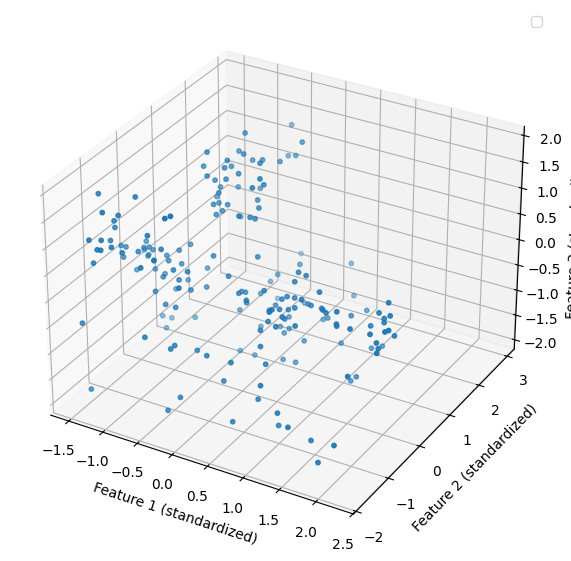

In [8]:
fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(x_scale[:, 0], x_scale[:, 1], x_scale[:, 2], s=10, cmap='viridis'
)

ax.set_xlabel('Feature 1 (standardized)')
ax.set_ylabel('Feature 2 (standardized)')
ax.set_zlabel('Feature 3 (standardized)')
ax.legend()
plt.show()

In [9]:
model = KMeans(n_clusters=4, random_state=42)
model.fit(x_scale)
y = model.labels_
centers= model.cluster_centers_


In [10]:
y

array([2, 2, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 2, 2, 0, 2, 2, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 2, 2, 0, 2, 2, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 2,
       0, 0, 2, 2, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 2, 0, 0, 2, 0, 0, 2,
       2, 0, 0, 2, 0, 0, 2, 2, 0, 2, 0, 2, 2, 0, 0, 2, 0, 2, 0, 0, 0, 0,
       0, 2, 3, 2, 2, 2, 0, 0, 0, 0, 2, 3, 1, 1, 3, 1, 3, 1, 0, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 0, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1], dtype=int32)

In [11]:
centers

array([[ 1.08616125, -0.49056525, -0.39717443],
       [-0.42880597,  0.97484722,  1.21608539],
       [-0.96249203, -0.78476346,  0.39202966],
       [ 0.03720536,  0.99011499, -1.18875705]])

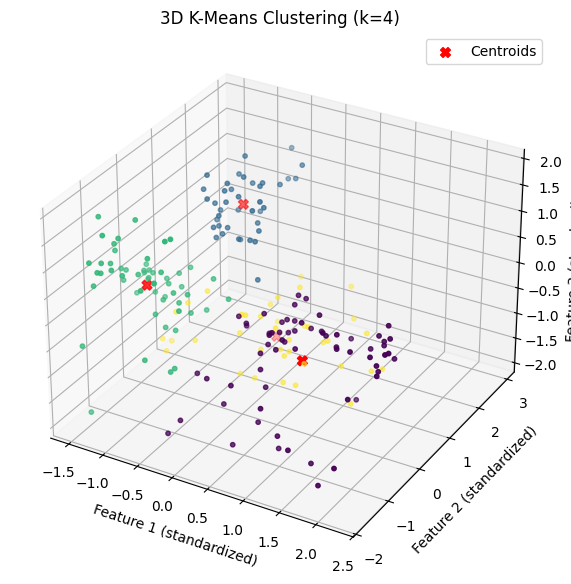

In [12]:
fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(x_scale[:, 0], x_scale[:, 1], x_scale[:, 2],c=y, s=10, cmap='viridis'
)

ax.scatter(centers[:, 0], centers[:, 1], centers[:, 2],c='red', s=50, marker='X', label='Centroids')

ax.set_xlabel('Feature 1 (standardized)')
ax.set_ylabel('Feature 2 (standardized)')
ax.set_zlabel('Feature 3 (standardized)')
ax.set_title(f'3D K-Means Clustering (k={4})')
ax.legend()
plt.show()

In [13]:
from sklearn.metrics import silhouette_score

In [14]:
# For finding the best K
max_score = -1
best_k = None

for i in range(2, 50):
    model = KMeans(n_clusters=i, random_state=42)
    model.fit(x_scale)
    y = model.fit_predict(x_scale)
    score = silhouette_score(x_scale, y)
    print(f"k={i}, silhouette score={score:.3f}")
    if score > max_score:
        max_score = score
        best_k = i
print("Best K is ",best_k)
print("Best Silhouette Score is ", round(max_score,3))

k=2, silhouette score=0.335
k=3, silhouette score=0.358
k=4, silhouette score=0.404
k=5, silhouette score=0.408
k=6, silhouette score=0.431
k=7, silhouette score=0.410
k=8, silhouette score=0.367
k=9, silhouette score=0.374
k=10, silhouette score=0.362
k=11, silhouette score=0.409
k=12, silhouette score=0.357
k=13, silhouette score=0.386
k=14, silhouette score=0.387
k=15, silhouette score=0.366
k=16, silhouette score=0.343
k=17, silhouette score=0.344
k=18, silhouette score=0.341
k=19, silhouette score=0.341
k=20, silhouette score=0.328
k=21, silhouette score=0.330
k=22, silhouette score=0.324
k=23, silhouette score=0.322
k=24, silhouette score=0.320
k=25, silhouette score=0.327
k=26, silhouette score=0.334
k=27, silhouette score=0.329
k=28, silhouette score=0.323
k=29, silhouette score=0.322
k=30, silhouette score=0.315
k=31, silhouette score=0.310
k=32, silhouette score=0.311
k=33, silhouette score=0.306
k=34, silhouette score=0.296
k=35, silhouette score=0.298
k=36, silhouette score

In [15]:
model = KMeans(n_clusters=best_k, random_state=42)
model.fit(x_scale)
y = model.labels_
centers= model.cluster_centers_

In [16]:
import plotly

In [18]:
import plotly.graph_objects as go
import numpy as np

# Assuming you have x_scale and centers defined
# If not, you'll need to define them first

# Create the 3D scatter plot
fig = go.Figure()

# Add data points
fig.add_trace(go.Scatter3d(
    x=x_scale[:, 0],
    y=x_scale[:, 1],
    z=x_scale[:, 2],
    mode='markers',
    marker=dict(
        size=4,
        color=y,                # Color by cluster
        colorscale='Viridis',   # Choose a colorscale
        opacity=0.8
    ),
    name='Data Points'
))

# Add centroids
fig.add_trace(go.Scatter3d(
    x=centers[:, 0],
    y=centers[:, 1],
    z=centers[:, 2],
    mode='markers',
    marker=dict(
        color='red',
        size=8,
        symbol='x'
    ),
    name='Centroids'
))

# Update layout
fig.update_layout(
    title=f'3D Interactive K-Means Clustering (k={best_k})',
    scene=dict(
        xaxis_title='Feature 1 (standardized)',
        yaxis_title='Feature 2 (standardized)',
        zaxis_title='Feature 3 (standardized)'
    ),
    legend=dict(orientation="h", yanchor="bottom", y=1.02, xanchor="right", x=1)
)

# Show the plot
fig.show()